In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

statlog_landsat_satellite = fetch_ucirepo(id=146)

X = statlog_landsat_satellite.data.features
y = statlog_landsat_satellite.data.targets

print(statlog_landsat_satellite.metadata)

print(statlog_landsat_satellite.variables)


{'uci_id': 146, 'name': 'Statlog (Landsat Satellite)', 'repository_url': 'https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite', 'data_url': 'https://archive.ics.uci.edu/static/public/146/data.csv', 'abstract': 'Multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood', 'area': 'Climate and Environment', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6435, 'num_features': 36, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C55887', 'creators': ['Ashwin Srinivasan'], 'intro_paper': None, 'additional_info': {'summary': "The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification as

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import train_test_split
import random as r

In [ ]:
best_accuracy = 0
best_kernel = ""
best_nu = 0
best_epsilon = 0
iteration = 100
kernel_list = [ 'sigmoid', 'rbf', 'poly', 'linear']

In [ ]:
def fitness_function(x_train, y_train, x_test, y_test, C, kernel, gamma):
    model = svm.SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    accuracy = accuracy_score(y_test, predicted) * 100
    return accuracy


In [ ]:
num_samples = 10
sample_indices = np.array_split(np.random.permutation(len(X)), num_samples)

In [ ]:
best_accuracy_list = []
best_params_list = []

In [ ]:
sample_indices

[array([4968, 2074, 3103,  238, 3740, 2677,  961,   58, 2292, 4982, 4795,
         906,  636, 2118, 3479, 3647,  258, 6225, 1609, 2084, 2632, 3205,
        4432, 5982, 3780, 6296, 3664,  441, 4546, 4549, 3171, 1781, 6173,
        4474, 3359, 2088, 2198, 4332, 1115, 3303, 4913, 2650, 5292, 3264,
        1335, 2299, 4662, 2402, 4975, 4610, 2994, 6077, 2048, 3416, 5604,
        6348, 1660, 3112, 4279, 3311, 1225, 3658, 3417, 2472, 5042, 1678,
         333, 5150, 1257, 2021, 2939, 4443, 6159, 3640, 4849, 1685,  857,
        4288, 1883,  932, 3791, 4383,  402, 4979, 2387, 2755, 3607, 6246,
        1151, 4797, 6220, 6414, 2324, 2028, 6340, 4335,  527, 5338,  153,
        1633, 2192,  948, 3784, 4869, 3114, 3102, 5468, 5328, 3076,  578,
        4676, 2517, 2022, 6169, 4090, 1053, 3943, 3868,  607, 5302, 6157,
         391, 1904,  767,  499, 5651, 3793, 2361,  969, 6209, 4925, 1565,
        3946, 5661, 4517, 5313, 3835, 1903, 5337, 3375, 1571, 5842, 1059,
        1160, 1505, 3319, 5649, 2430, 

In [ ]:
for indices in sample_indices:
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[indices], y.iloc[indices], test_size=0.3, random_state=42)

    best_accuracy = 0
    best_params = {'C': 0, 'kernel': '', 'gamma': 0}

    for j in range(iteration):
        C = np.random.uniform(0.1, 10)
        kernel = np.random.choice(kernel_list)
        gamma = np.random.uniform(0,10)

        try:
            accuracy = fitness_function(X_train, y_train, X_test, y_test, C, kernel, gamma)
        except ValueError:
            continue

        if accuracy > best_accuracy:
            best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}
            best_accuracy = accuracy

    best_accuracy_list.append(best_accuracy)
    best_params_list.append(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
best_accuracy_list

[83.50515463917526,
 82.9896907216495,
 83.50515463917526,
 84.02061855670104,
 81.44329896907216,
 80.82901554404145,
 81.86528497409327,
 78.75647668393782,
 86.01036269430051,
 81.86528497409327]

In [ ]:

results = []

for i, (best_params, accuracy) in enumerate(zip(best_params_list, best_accuracy_list), start=1):
    results.append({'Sample Number': i,
                    'C': best_params['C'],
                    'Kernel': best_params['kernel'],
                    'Gamma': best_params['gamma'],
                    'Accuracy': accuracy})

results_df = pd.DataFrame(results)

print(results_df)


   Sample Number         C  Kernel     Gamma   Accuracy
0              1  7.077279    poly  9.594163  83.505155
1              2  9.980983    poly  2.192507  82.989691
2              3  0.455529  linear  0.625013  83.505155
3              4  8.895985    poly  9.973105  84.020619
4              5  1.502267    poly  5.393537  81.443299
5              6  6.656706  linear  8.064320  80.829016
6              7  8.886661    poly  7.131135  81.865285
7              8  3.082714  linear  3.529657  78.756477
8              9  6.487847    poly  1.611877  86.010363
9             10  0.241945  linear  0.445809  81.865285


In [ ]:
max_accuracy_index = best_accuracy_list.index(max(best_accuracy_list))

max_accuracy_value = max(best_accuracy_list)

print('Sample no',max_accuracy_index+1,'is best with accuracy',max_accuracy_value)

Sample no 9 is best with accuracy 86.01036269430051


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

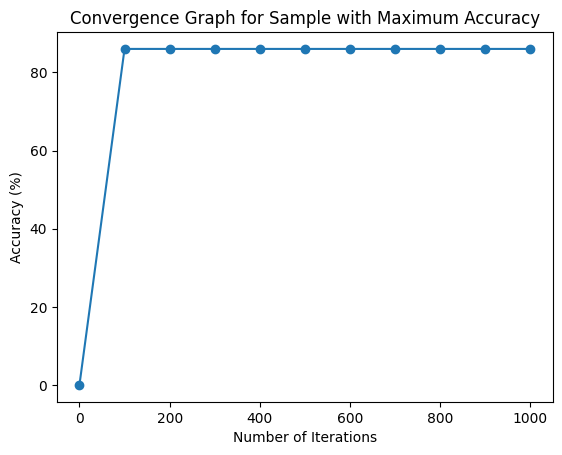

In [ ]:
#for convergence of sample 9
accuracy_values = []
num_iterations_range = range(0, 1001, 100)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[sample_indices[8]], y.iloc[sample_indices[8]], test_size=0.3, random_state=42)
for num_iterations in num_iterations_range:
    best_accuracy = 0
    best_params = {'C': 0, 'kernel': '', 'gamma': 0}

    for j in range(num_iterations):
        C = np.random.uniform(0.1, 10)
        kernel = np.random.choice(kernel_list)
        gamma = np.random.uniform(0, 10)

        try:
            accuracy = fitness_function(X_train, y_train, X_test, y_test, C, kernel, gamma)
        except ValueError:
            continue

        if accuracy > best_accuracy:
            best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}
            best_accuracy = accuracy
    accuracy_values.append(best_accuracy)

plt.plot(num_iterations_range, accuracy_values, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy (%)')
plt.title('Convergence Graph for Sample with Maximum Accuracy')
plt.show()

In [ ]:
plt.plot(range(1, iteration + 1), best_accuracy_list[max_accuracy_idx], label='Max Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Convergence Graph (Max Accuracy)')
plt.legend()
plt.show()


NameError: name 'max_accuracy_idx' is not defined